<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-secret-whiteboard/blob/master/Rectangle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
!pip install opencv-python==4.1.1.26
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

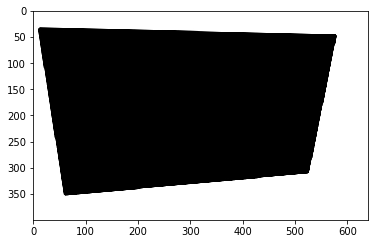

In [206]:
img_read = io.imread("https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-secret-whiteboard/master/img/samples/sample3.jpg")
img = cv.cvtColor(img_read, cv.COLOR_BGR2GRAY)
img_color = cv.cvtColor(img_read, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap="gray")


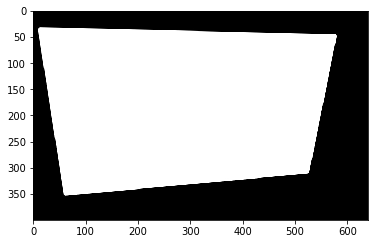

In [207]:
#img2 = cv.GaussianBlur(img,(5,5),0)
#img3 = cv.adaptiveThreshold(img2, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 5, 8)
#plt.imshow(img3, cmap="gray")
img = cv.bitwise_not(img)
plt.imshow(img, cmap="gray")

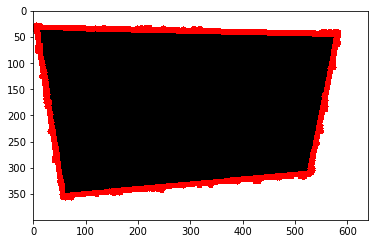

In [208]:
contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_color, contours, -1, (255,0,0), 10)
plt.imshow(img_color)

[[[  4  30]]

 [[ 57 356]]

 [[529 311]]

 [[583  42]]]


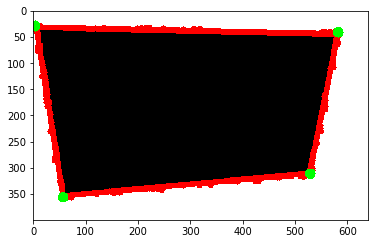

In [209]:
npContours = np.array(contours)
#for i in contours:
i = 0;
while i < len(contours):
  approx = cv.approxPolyDP(npContours[i], cv.arcLength(npContours[i], True)*0.02, True)
  i+=1
  if len(approx) == 4 and abs(cv.contourArea(approx)) > 1000 and cv.isContourConvex(approx):
    print(approx)
    len(approx)
    cv.drawContours(img_color, approx, -1, (0,255,0), 20)
    plt.imshow(img_color)


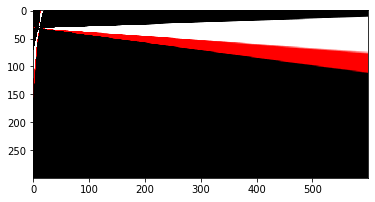

In [222]:
rows,cols,ch = img_color.shape

pts2 = np.float32([approx[0], approx[2], approx[1], approx[3]])
pts1 = np.float32([[10,10],[600,10], [10,300],[600, 300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img_color,M,(600,300))
plt.imshow(dst)